<a href="https://colab.research.google.com/github/Rajit13/CASSUM-24/blob/main/CASSUM_data_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For installing $\LaTeX$

In [ ]:
!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super


# Observed Planet

1.   Planet Parameters:

* Mass: $3\,\rm M_\oplus$
* Radius: $1.3\,\rm R_\oplus$
* Period: $1.47$ days

2.   Host:

* M-dwarf star ($T_{\rm eff} = 3291$ K)
* Mass: $0.32\, \rm M_\odot$

3. Model Planetary Atmposphere Contains: H, C, O





Metallicity distribution

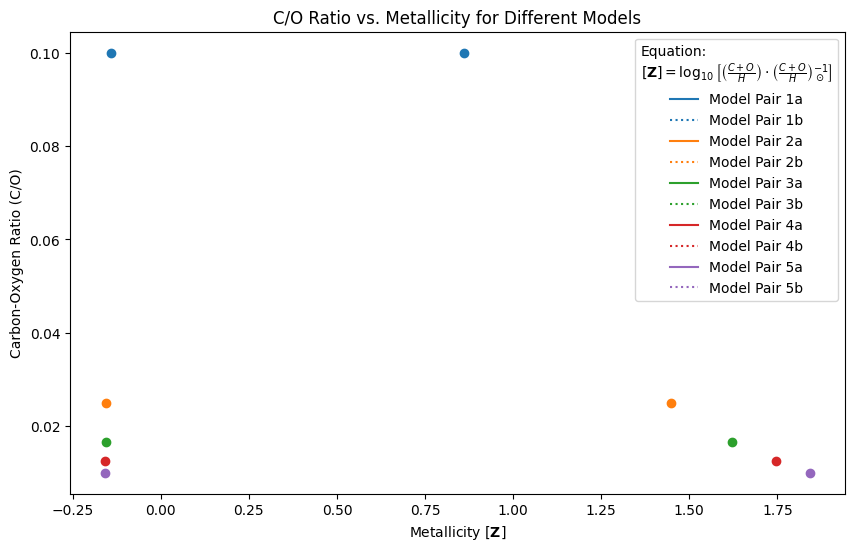

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the model pairs
model_pairs = {
    "Model Pair 1a": {"C/O": 1/10, "Z": -1.407E-01},
    "Model Pair 1b": {"C/O": 1/10, "Z": 8.593E-01},
    "Model Pair 2a": {"C/O": 1/40, "Z": -1.548E-01},
    "Model Pair 2b": {"C/O": 1/40, "Z": 1.447E+00},
    "Model Pair 3a": {"C/O": 1/60, "Z": -1.564E-01},
    "Model Pair 3b": {"C/O": 1/60, "Z": 1.622E+00},
    "Model Pair 4a": {"C/O": 1/80, "Z": -1.572E-01},
    "Model Pair 4b": {"C/O": 1/80, "Z": 1.746E+00},
    "Model Pair 5a": {"C/O": 1/100, "Z": -1.577E-01},
    "Model Pair 5b": {"C/O": 1/100, "Z": 1.842E+00}
}

# Define colors for each pair
colors = {
    "1": "tab:blue",
    "2": "tab:orange",
    "3": "tab:green",
    "4": "tab:red",
    "5": "tab:purple"
}

# Separate the data into x and y values and assign colors
x_values = []
y_values = []
colors_list = []
labels = list(model_pairs.keys())

for key in labels:
    pair_number = key.split()[2][0]  # Extract the pair number (1, 2, 3, etc.)
    x_values.append(model_pairs[key]["Z"])
    y_values.append(model_pairs[key]["C/O"])
    colors_list.append(colors[pair_number])

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each point with a label
for i in range(len(labels)):
    linestyle = 'dotted' if 'b' in labels[i] else 'solid'
    plt.scatter(x_values[i], y_values[i], color=colors_list[i])
    plt.plot([x_values[i]], [y_values[i]], color=colors_list[i], linestyle=linestyle, label=labels[i])

# Set the labels and title
plt.xlabel('Metallicity $[\mathbf{Z}]$')
plt.ylabel('Carbon-Oxygen Ratio (C/O)')
plt.title('C/O Ratio vs. Metallicity for Different Models')

# Add equation to the legend
equation = r"$[\mathbf{Z}] = \log_{10} \left[\left(\frac{C+O}{H}\right) \cdot \left(\frac{C+O}{H}\right)_\odot^{-1} \right]$"
plt.legend(loc='best', title=f'Equation:\n{equation}')

# Add grid for better readability
#plt.grid(True)

# Display the plot
plt.show()


From observed models $\rightarrow$ PandExo $\rightarrow$ Adding a 4th column for Resolution, $R=\lambda/\Delta \lambda$

In [ ]:
import os
import pandas as pd
import zipfile
import shutil

# Paths to the ZIP files
zip_files = ['/content/CO2_R100.zip', '/content/H2O_R100.zip']  # Replace with your ZIP file paths
output_dir = 'Processed_Files'  # Directory to store formatted files

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define a function to process each text file
def process_file(file_path, output_path):
    # Read the file into a DataFrame
    data = pd.read_csv(file_path, sep=' ', header=None, names=['Wavelength', 'Transit Depth', 'Error'])

    # Calculate the Resolution
    data['Resolution'] = data['Wavelength'] / data['Wavelength'].diff().abs()

    # Calculate the average resolution excluding the first value
    average_resolution = data['Resolution'][1:].mean()

    # Assign the average resolution to the first data point
    data['Resolution'].iloc[0] = average_resolution

    # Save the formatted file
    with open(output_path, 'w') as f:
        f.write(f"{'Wavelength':<15}{'Transit Depth':<20}{'Err_Transit Depth':<20}{'Resolution':<20}\n")
        for _, row in data.iterrows():
            f.write(
                f"{row['Wavelength']:<15.6f}"
                f"{row['Transit Depth']:<20.10f}"
                f"{row['Error']:<20.10f}"
                f"{row['Resolution']:<20.6f}\n"
            )

# Process all text files in each ZIP file
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall('temp_files')  # Extract to a temporary directory
        for root, _, files in os.walk('temp_files'):  # Walk through all directories
            for file_name in files:
                if file_name.endswith('.txt'):  # Only process text files
                    input_path = os.path.join(root, file_name)
                    relative_path = os.path.relpath(input_path, 'temp_files')
                    output_path = os.path.join(output_dir, f"Formatted_{relative_path}")
                    os.makedirs(os.path.dirname(output_path), exist_ok=True)
                    process_file(input_path, output_path)

# Cleanup temporary files
shutil.rmtree('temp_files')

print(f"All files processed and saved in '{output_dir}'")

In [ ]:
import shutil
from google.colab import files

# Path to the folder you want to compress and download
folder_to_zip = 'Processed_Files'
zip_file_name = 'Processed_Files.zip'

# Compress the folder into a ZIP file
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_to_zip)

# Download the ZIP file
files.download(zip_file_name)
